# Import

In [1]:
from utils.ActionGenerator import ActionsGenerator
from utils.plot_regret import plot_regret 
from utils.Play import play 
from utils.Experiment import experiment
from Agents.UCB import UCB
from Agents.LinUCB import LinUCB
from Agents.RB_agent import RegretBalancingAgent
from Agents.RB_representation import RegretBalancing_Representation
from environments.BanditEnv import BanditEnv
from environments.BernoulliBanditEnv import BernoulliBanditEnv
from environments.LinearBandit import LinearBandit
import matplotlib.pyplot as plt
import numpy as np
from Agents.EpsilonGreedy import EpsilonGreedy
import random

In [2]:
np.random.seed(1)

# When Context is needed ?

## Here, yes, context dependent environment

In [18]:
d = 10  # dimension
K = 5  # number of arms

# parametor vector \theta, normalized :
thetaTrue = ActionsGenerator(1,d)[0]
thetaTrue /= np.linalg.norm(thetaTrue)

T = 100  # Finite Horizon
N = 250  # Monte Carlo simulations

delta = 0.1 
sigma = 0.1

#choice of percentile display
q = 10

In [19]:
actionSet = random.shuffle(ActionsGenerator(K,d))
env = LinearBandit(thetaTrue, K, var=sigma**2, fixed_actions=actionSet)

In [20]:
linucb = LinUCB(d=d, lambda_reg=1., delta=delta, sigma=sigma)
ucb = UCB(K=K, alpha=2.)
UCBs = [linucb, ucb]

In [21]:
rb_agent = RegretBalancingAgent(learners = UCBs, 
                                K = K, 
                                delta = delta, 
                                u_bounds = [lambda x : np.sqrt(x * K) for _ in range(len(UCBs))],
                                env = env)

In [22]:
all_data = experiment(env, [linucb, ucb, rb_agent], Nmc=N, T=T, bern=False)

In [23]:
# Update rcParams
plt.rcParams.update({
    'axes.titlesize': 16,           # Title size for the axes
    'axes.labelsize': 16,           # Label size for the axes
    'xtick.labelsize': 14,          # Label size for x-axis ticks
    'ytick.labelsize': 14,          # Label size for y-axis ticks
    'legend.fontsize': 12,          # Font size for legend
    'text.usetex': True,            # Use LaTeX for text rendering
    'font.family': 'serif',         # Use serif font (LaTeX default)
})

c:\Users\theom\Desktop\AML\Advanced-ML\src\utils\plot_regret.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  reg_plot.show()


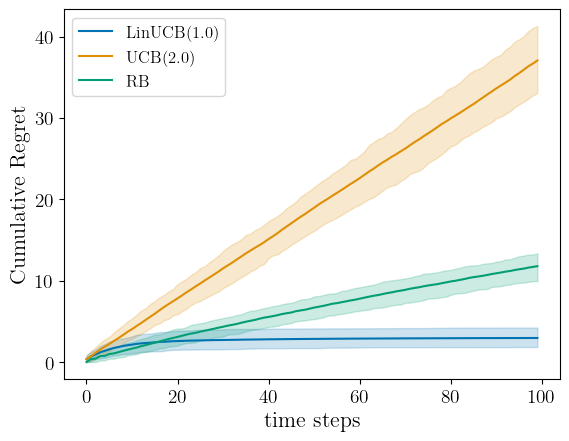

In [25]:
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10, save_pdf='RBucb.pdf')